In [ ]:
#글꼴 탐색 ㄱㄱ
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

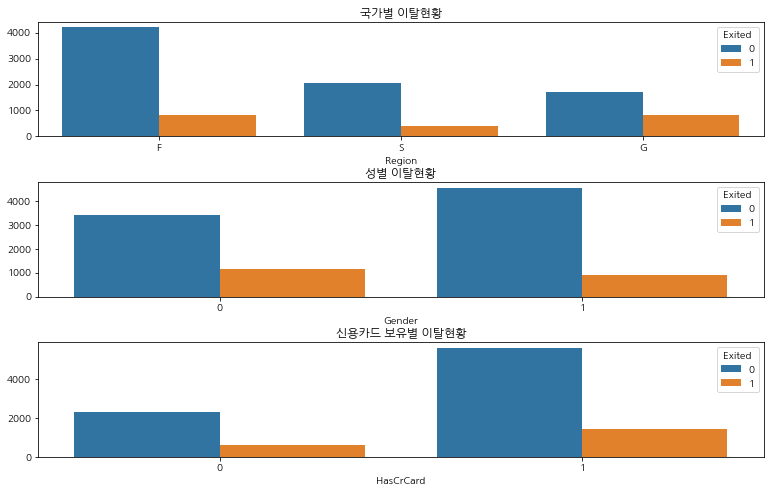

In [14]:
#1-1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
from matplotlib import font_manager

bank = pd.read_excel('bank_new.xlsx')

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(13,8))

sns.countplot(x='Region', hue='Exited', data=bank, ax=ax1)
ax1.set_title('국가별 이탈현황')
ax1.set_ylabel('')

sns.countplot(x='Gender', hue='Exited', data=bank, ax=ax2)
ax2.set_title('성별 이탈현황')
ax2.set_ylabel('')

sns.countplot(x='HasCrCard', hue='Exited', data=bank, ax=ax3)
ax3.set_title('신용카드 보유별 이탈현황')
ax3.set_ylabel('')

plt.rc('font', family='NanumBarunGothic')
plt.subplots_adjust(wspace=0, hspace=0.4)


In [79]:
bank.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Region
9995,771,1,39,5,0.00,2,1,96270.64,0,F
9996,516,1,35,10,57369.61,1,1,101699.77,0,F
9997,709,0,36,7,0.00,1,0,42085.58,1,F
9998,772,1,42,3,75075.31,2,1,92888.52,1,G
9999,792,0,28,4,130142.79,1,1,38190.78,0,F


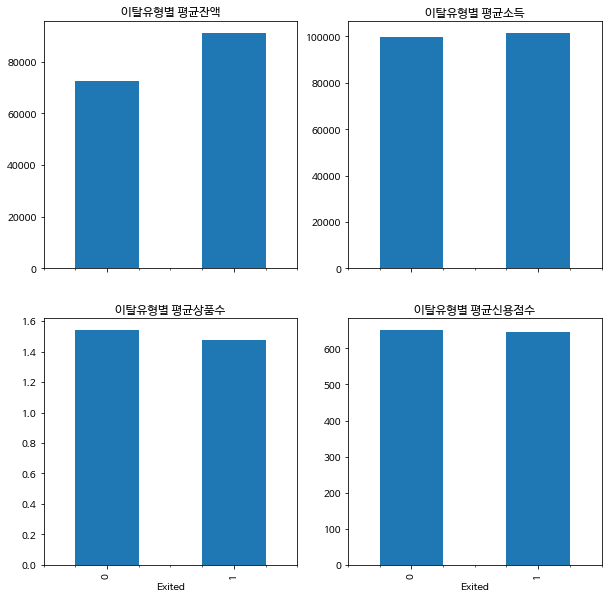

In [80]:
#1-2
bank=pd.read_excel('bank_new.xlsx')
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, figsize=(10,10))

bank.pivot_table(index='Exited', values='Balance', aggfunc='mean').plot.bar(legend=False, ax=ax1)
ax1.set_title('이탈유형별 평균잔액')
bank.pivot_table(index='Exited', values='EstimatedSalary', aggfunc='mean').plot.bar(legend=False, ax=ax2)
ax2.set_title('이탈유형별 평균소득')
bank.pivot_table(index='Exited', values='NumOfProducts', aggfunc='mean').plot.bar(legend=False, ax=ax3)
ax3.set_title('이탈유형별 평균상품수')
bank.pivot_table(index='Exited', values='CreditScore', aggfunc='mean').plot.bar(legend=False,ax=ax4)
ax4.set_title('이탈유형별 평균신용점수')
plt.rc('font', family='NanumGothic')

C:\Users\kmb03\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kmb03\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kmb03\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

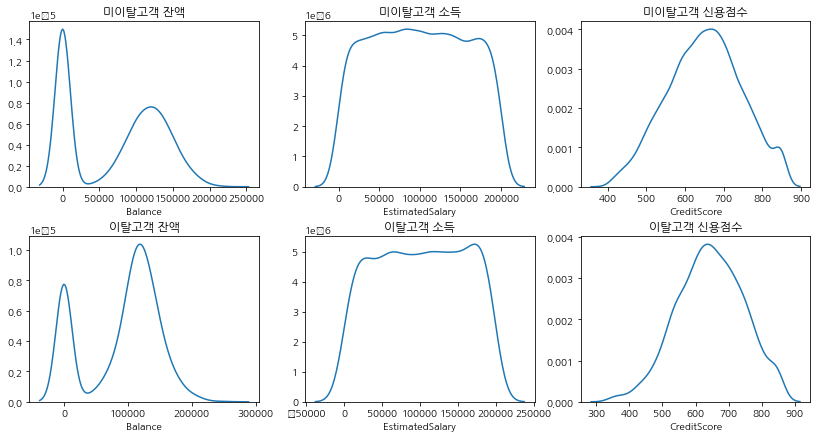

In [90]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(14,7))
#미이탈: exited=0
bank_0=bank.query('Exited==0')

sns.distplot(bank_0['Balance'],hist=False, ax=ax1)
ax1.set_title('미이탈고객 잔액')
ax1.set_ylabel('')
sns.distplot(bank_0['EstimatedSalary'],hist=False, ax=ax2)
ax2.set_title('미이탈고객 소득')
ax2.set_ylabel('')
sns.distplot(bank_0['CreditScore'],hist=False, ax=ax3)
ax3.set_title('미이탈고객 신용점수')
ax3.set_ylabel('')

#이탈: exited=1
bank_1=bank.query('Exited==1')

sns.distplot(bank_1['Balance'],hist=False, ax=ax4)
ax4.set_title('이탈고객 잔액')
ax4.set_ylabel('')
sns.distplot(bank_1['EstimatedSalary'],hist=False, ax=ax5)
ax5.set_title('이탈고객 소득')
ax5.set_ylabel('')
sns.distplot(bank_1['CreditScore'],hist=False, ax=ax6)
ax6.set_title('이탈고객 신용점수')
ax6.set_ylabel('')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.rc('font', family='NanumGothic')


In [82]:
#1-4
import statsmodels.formula.api as smf
formula="Exited~CreditScore+C(Gender)+Age+Tenure+Balance+NumOfProducts+C(HasCrCard)+EstimatedSalary+C(Region)"
model=smf.logit(formula, data=bank)
result=model.fit()
print(result.summary())
#많은 사람들이 신용카드를 가지고 있기 대문에 신용카드를 보유한 고객의 이탈'수'가 많은 것이지, 이탈률(이탈가능성)이 높은 것이 아님

Optimization terminated successfully.
         Current function value: 0.446713
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.1163
Time:                        21:44:09   Log-Likelihood:                -4467.1
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                2.745e-246
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.4210      0.239    -14.319      0.000      -3.889      -2.953
C(Gender

남성의 이탈률이 여성의 이탈률보다 낮다고 할 수 있수(기울기 계수가 음수),
독일의 이탈률이 타 국가보다 이탈률이 높다고 할 수 있다.

신용 점수, 보유중인상품수는 높아질수록 이탈률이 낮아지며,
나이, 계좌잔고는 높아질수록 이탈률이 높아질 수 있겠다.


In [129]:
#2-0 데이터는 일주일 판매량인데 문제에서 요구하는 것은 월 판매량이므로 데이터 전처리 필요
import statsmodels.api as sm
sale=pd.read_excel('sale.xlsx')
sale.drop(0,inplace=True)
sale.set_index('date',inplace=True)
sale=sale.resample('M').sum()
sale

,sale
date,
2016-12-31,8
2017-01-31,21
2017-02-28,7
2017-03-31,19
2017-04-30,14
2017-05-31,38
2017-06-30,14
2017-07-31,21
2017-08-31,14


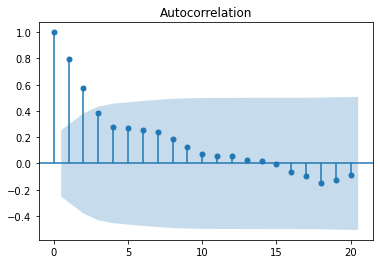

In [130]:
#2-1 월판매량의 자기상관계수
sm.graphics.tsa.plot_acf(sale, lags=20)
plt.rc('font', family='MalgunGothic')

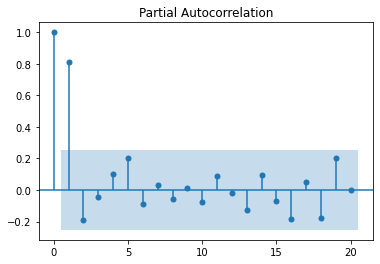

In [131]:
#2-2 월판매량의 편자기상관계수
sm.graphics.tsa.plot_pacf(sale, lags=20)
plt.rc('font', family='MalgunGothic')

In [37]:
#2-3
import statsmodels.tsa.api as tsa
sale=pd.read_excel('sale.xlsx', usecols='B')
model=tsa.ARMA(sale,(2,0))
result=model.fit()
result.summary() #시계열모형 추정 

C:\Users\kmb03\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   sale   No. Observations:                  260
Model:                     ARMA(2, 0)   Log Likelihood                -961.787
Method:                       css-mle   S.D. of innovations              9.754
Date:                Thu, 23 Dec 2021   AIC                           1931.575
Time:                        00:15:18   BIC                           1945.817
Sample:                             0   HQIC                          1937.300
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8508      4.611      2.787      0.005       3.813      21.889
ar.L1.sale     0.4823      0.057      8.476      0.000       0.371       0.594
ar.L2.sale     0.3911      0.057      6.866      0.000       0.279       0.503
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0972           +0.0000j            1.0972            0.0000
AR.2           -2.3306           +0.0000j            2.3306            0.5000
-----------------------------------------------------------------------------
"""

In [46]:
#2-4 추정한 모형을 이용하여 판매량 예측
a=result.forecast(6)[0]
a=a.astype(int) #정수변환
print("1 월 예정 판매량: ", a[0])
for i in range(1,6):
    print(i,"월 예정 판매량: ", a[i])

1 월 예정 판매량:  5
1 월 예정 판매량:  4
2 월 예정 판매량:  6
3 월 예정 판매량:  6
4 월 예정 판매량:  7
5 월 예정 판매량:  7


In [147]:
result.predict() #이건 뭐냐?.....

0      12.850790
1       2.672087
2       1.627158
3       1.627158
4       5.485777
         ...    
255     7.858055
256     8.496972
257    15.092964
258    14.845100
259    11.625399
Length: 260, dtype: float64

In [154]:
supermarket

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
Transaction,,,,,,,,,,,,,,,,
1,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
4,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
5,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
996,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
997,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True


In [ ]:
!pip install mlxtend

In [161]:
#3
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

supermarket=pd.read_excel('supermarket.xlsx')
supermarket.set_index('Transaction',inplace=True)
supermarket_1=supermarket.applymap(lambda x:1 if x>=1 else 0)
frequent_itemsets=apriori(supermarket_1, min_support=0.1, use_colnames=True)
print(frequent_itemsets.tail())
rules=association_rules(frequent_itemsets, metric='lift', min_threshold=1.4)
rules

      support                        itemsets
164  0.101101  (Ice cream, chocolate, Nutmeg)
165  0.101101   (Ice cream, Onion, chocolate)
166  0.100100    (Kidney Beans, Nutmeg, Milk)
167  0.101101  (Kidney Beans, Nutmeg, Yogurt)
168  0.104104       (chocolate, Milk, Yogurt)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968
1,(Onion),"(Dill, Cheese)",0.403403,0.177177,0.102102,0.253102,1.428523,0.030628,1.101653
2,"(Dill, Milk)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446
3,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051
4,(Milk),"(Dill, chocolate)",0.405405,0.199199,0.114114,0.281481,1.413065,0.033358,1.114517
5,(chocolate),"(Dill, Milk)",0.421421,0.190190,0.114114,0.270784,1.423753,0.033964,1.110521
6,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764
7,(chocolate),"(Unicorn, Dill)",0.421421,0.168168,0.101101,0.239905,1.426578,0.030231,1.094379


In [183]:
supermarket

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
Transaction,,,,,,,,,,,,,,,,
1,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
4,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
5,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
996,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
997,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True


In [7]:
#4 데이터 전처리
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

big=pd.read_excel('big.xlsx')
#Member: 고객ID, Order: 거래번호, SKU 제품번호, Description: 제품설명(drop해)
#big.drop(['Member','Order','SKU'],axis=1,inplace=True) #필요한 데이터만 뽑자
big['수량']=1
basket=big.pivot_table(index=['Member','Order'], columns='Description', values='수량', aggfunc='sum')
basket.fillna(0,inplace=True)
basket.head(20)
basket_1=basket.applymap(lambda x:1 if x>=1 else 0)
frequent_itemsets=apriori(basket_1, min_support=0.1, use_colnames=True)
print(frequent_itemsets.tail())
rules=association_rules(frequent_itemsets, metric='lift', min_threshold=1.7)
rules

     support                                           itemsets
37  0.113032         (Beans, Root Vegetables, Gourd & Cucumber)
38  0.153571         (Beans, Other Vegetables, Root Vegetables)
39  0.100274     (Gourd & Cucumber, Other Vegetables, Brinjals)
40  0.109336      (Root Vegetables, Other Vegetables, Brinjals)
41  0.120186  (Root Vegetables, Other Vegetables, Gourd & Cu...


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gourd & Cucumber),(Brinjals),0.300346,0.272445,0.141409,0.470822,1.728132,0.059581,1.374876
1,(Brinjals),(Gourd & Cucumber),0.272445,0.300346,0.141409,0.519037,1.728132,0.059581,1.454695
2,"(Beans, Other Vegetables)",(Gourd & Cucumber),0.244664,0.300346,0.131632,0.538012,1.791308,0.058148,1.514441
3,(Gourd & Cucumber),"(Beans, Other Vegetables)",0.300346,0.244664,0.131632,0.438269,1.791308,0.058148,1.344658
4,"(Other Vegetables, Gourd & Cucumber)",(Brinjals),0.195183,0.272445,0.100274,0.513745,1.885679,0.047098,1.496240
5,"(Other Vegetables, Brinjals)",(Gourd & Cucumber),0.172529,0.300346,0.100274,0.581202,1.935111,0.048456,1.670627
6,(Gourd & Cucumber),"(Other Vegetables, Brinjals)",0.300346,0.172529,0.100274,0.333863,1.935111,0.048456,1.242193
7,(Brinjals),"(Other Vegetables, Gourd & Cucumber)",0.272445,0.195183,0.100274,0.368053,1.885679,0.047098,1.273550


[[-0.4249337  -0.34911414 -0.4668054  ... -0.51138082 -0.96037969
  -0.52902627]
 [-0.4695839  -0.45460688  2.6054375  ... -0.59184052  0.68860056
   0.81854607]
 [-0.10771601 -0.45460688 -0.4668054  ... -0.10908229  0.82601558
  -0.38385745]
 ...
 [-0.40200016 -0.29493024 -0.4668054  ... -0.39069126 -0.96037969
  -0.57066048]
 [-0.4695839  -0.45460688 -0.44937277 ... -0.59184052 -1.09779471
  -0.58058129]
 [ 0.0420915  -0.45460688 -0.40622786 ...  0.3334461  -0.90541368
  -0.57691448]]


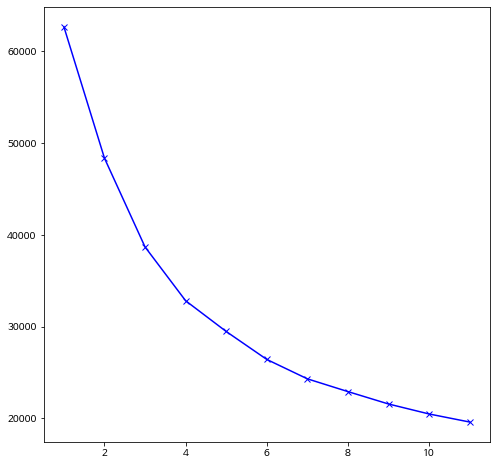

In [32]:
#5 데이터 전처리
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
credit=pd.read_excel('credit.xlsx')
credit.drop('CUST_ID',axis=1,inplace=True)
credit.dropna(inplace=True)
scaler=StandardScaler()
credit_scaled=scaler.fit_transform(credit)
print(credit_scaled)#전처리 된 데이터 출력

#빈 배열 만들어서 elbow method 구하기
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(credit_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')

C:\Users\kmb03\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kmb03\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


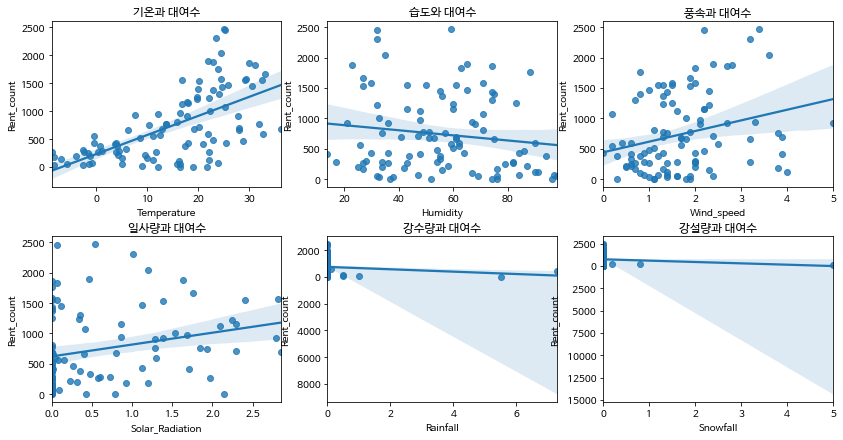

In [15]:
#6-1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
from matplotlib import font_manager
import statsmodels.formula.api as smf

seoulbike=pd.read_excel('SeoulBikeData.xlsx')
seoulbike_s=seoulbike.sample(n=100)

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(14,7))

#기온과 대여수
sns.regplot(x='Temperature', y='Rent_count', data=seoulbike_s, ax=ax1)
ax1.set_title('기온과 대여수')

sns.regplot(x='Humidity', y='Rent_count', data=seoulbike_s, ax=ax2)
ax2.set_title('습도와 대여수')

sns.regplot(x='Wind_speed', y='Rent_count', data=seoulbike_s, ax=ax3)
ax3.set_title('풍속과 대여수')

sns.regplot(x='Solar_Radiation', y='Rent_count', data=seoulbike_s, ax=ax4)
ax4.set_title('일사량과 대여수')

sns.regplot(x='Rainfall', y='Rent_count', data=seoulbike_s, ax=ax5)
ax5.set_title('강수량과 대여수')

sns.regplot(x='Snowfall', y='Rent_count', data=seoulbike_s, ax=ax6)
ax6.set_title('강설량과 대여수')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.rc('font', family='NanumBarunGothic')

In [12]:
#6-2
import statsmodels.formula.api as smf
formula="Rent_count~Temperature+Humidity+Wind_speed+Solar_Radiation\
+Rainfall+Snowfall"
Bikemodel=smf.ols(formula, data=seoulbike_s)
result=Bikemodel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Rent_count   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     11.97
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           6.39e-10
Time:                        23:48:23   Log-Likelihood:                -753.42
No. Observations:                 100   AIC:                             1521.
Df Residuals:                      93   BIC:                             1539.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         829.7690    216.023      3.841      0.000     400.789    1258.749
Temperature        36.8631      5.223      7.058      0.000      26.492      47.235
Humidity           -9.0551      3.106     -2.915      0.004     -15.224      -2.887
Wind_speed         65.5913     49.925      1.314      0.192     -33.550     164.733
Solar_Radiation  -200.2309     76.501     -2.617      0.010    -352.147     -48.315
Rainfall         -353.4190    199.721     -1.770      0.080    -750.025      43.187
Snowfall          -22.8900     82.446     -0.278      0.782    -186.612     140.832
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.156
Skew:                          -0.033   Prob(JB):                        0.561
Kurtosis:                       3.523   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Date,Hour,Rent_count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall
0,01/12/2017,0,254,-5.2,37,2.2,2000,0.0,0.0,0.0
1,01/12/2017,1,204,-5.5,38,0.8,2000,0.0,0.0,0.0
2,01/12/2017,2,173,-6.0,39,1.0,2000,0.0,0.0,0.0
3,01/12/2017,3,107,-6.2,40,0.9,2000,0.0,0.0,0.0
4,01/12/2017,4,78,-6.0,36,2.3,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,1003,4.2,34,2.6,1894,0.0,0.0,0.0
8756,30/11/2018,20,764,3.4,37,2.3,2000,0.0,0.0,0.0
8757,30/11/2018,21,694,2.6,39,0.3,1968,0.0,0.0,0.0
8758,30/11/2018,22,712,2.1,41,1.0,1859,0.0,0.0,0.0


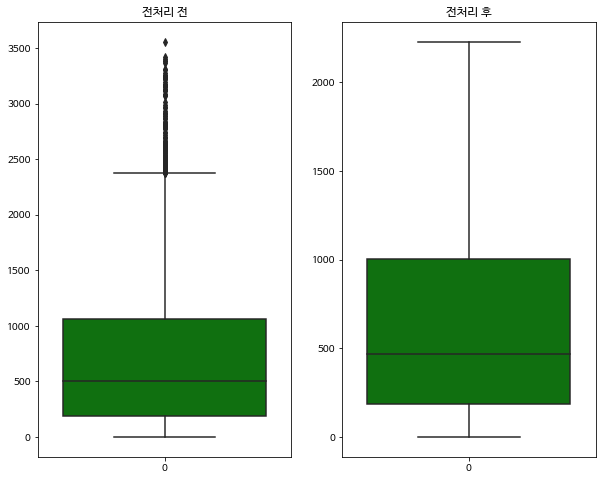

In [33]:
#6-3 데이터 전처리 전, 후 boxplot 출력
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,8))
sns.boxplot(data=seoulbike['Rent_count'],color='green', ax=ax1)
ax1.set_title('전처리 전')
#2500부터 이상치라 할 수 있겠다.
fixed_seoulbike=seoulbike[seoulbike['Rent_count']<=2230]
sns.boxplot(data=fixed_seoulbike['Rent_count'],color='green', ax=ax2)
ax2.set_title('전처리 후')
fixed_seoulbike

In [35]:
#3-3
import statsmodels.formula.api as smf
formula="Rent_count~Temperature+Humidity+Wind_speed+Solar_Radiation\
+Rainfall+Snowfall"
Bikemodel=smf.ols(formula, data=seoulbike_s)
result=Bikemodel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Rent_count   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     17.33
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           2.34e-13
Time:                        00:09:19   Log-Likelihood:                -748.92
No. Observations:                 100   AIC:                             1512.
Df Residuals:                      93   BIC:                             1530.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         487.8176    200.855      2.429      0.017      88.960     886.675
Temperature        41.5953      4.698      8.853      0.000      32.265      50.925
Humidity           -9.5676      2.993     -3.197      0.002     -15.510      -3.625
Wind_speed        154.0426     50.847      3.030      0.003      53.071     255.014
Solar_Radiation  -146.9331     74.625     -1.969      0.052    -295.123       1.256
Rainfall          -82.3998     52.230     -1.578      0.118    -186.119      21.319
Snowfall           65.3705     93.129      0.702      0.484    -119.566     250.307
==============================================================================
Omnibus:                        0.055   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.170
Skew:                          -0.048   Prob(JB):                        0.918
Kurtosis:                       2.823   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""